In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [37]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

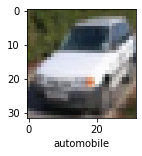

In [10]:
plot_sample(X_train, y_train, 46)

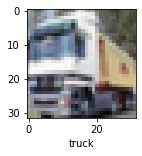

In [11]:
plot_sample(X_train, y_train, 1)

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 84s 52ms/step - loss: 1.8116 - accuracy: 0.3558
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6224 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5421 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4804 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4302 - accuracy: 0.4967


In [19]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=bbb89bc2bc44a732e72272705852e263b895731379a970c4aabbfa17c4be64c8
  Stored in directory: c:\users\shantha\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.44      0.52      1000
           1       0.63      0.61      0.62      1000
           2       0.40      0.29      0.34      1000
           3       0.39      0.27      0.32      1000
           4       0.43      0.39      0.41      1000
           5       0.45      0.31      0.37      1000
           6       0.36      0.78      0.49      1000
           7       0.68      0.40      0.51      1000
           8       0.44      0.77      0.56      1000
           9       0.59      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 24ms/step - loss: 1.4394 - accuracy: 0.4809
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0871 - accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9553 - accuracy: 0.6677
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8624 - accuracy: 0.7016
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7870 - accuracy: 0.7275
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7300 - accuracy: 0.7451
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6723 - accuracy: 0.7631
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6261 - accuracy: 0.7829
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.5789 - accuracy: 0.7974
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 10ms/step - loss: 0.9667 - accuracy: 0.6946


[0.9666804671287537, 0.694599986076355]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[1.82009622e-04, 1.67428880e-04, 1.66893558e-04, 9.71257925e-01,
        1.21302437e-05, 1.78881790e-02, 3.21343308e-03, 1.83973243e-04,
        6.90847496e-03, 1.94616296e-05],
       [1.43448869e-03, 3.84624213e-01, 2.67827829e-07, 6.27561434e-08,
        6.57716669e-07, 7.80273890e-09, 9.04261610e-10, 1.30285782e-08,
        6.13620400e-01, 3.19892919e-04],
       [2.45584846e-01, 3.54584485e-01, 9.97649413e-03, 1.38794795e-01,
        1.25773461e-03, 6.52061030e-03, 8.25474039e-04, 2.67049707e-02,
        2.00836778e-01, 1.49138821e-02],
       [6.04642868e-01, 5.78911649e-03, 1.99090898e-01, 1.22553855e-02,
        1.85406879e-02, 3.18430866e-05, 1.32947287e-04, 5.52947924e-04,
        1.58411786e-01, 5.51651698e-04],
       [7.25085103e-10, 8.95615582e-09, 9.28680529e-04, 3.80677148e-03,
        9.01193380e-01, 1.78519680e-04, 9.38923955e-02, 1.14958581e-07,
        7.91854120e-08, 3.74675668e-09]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

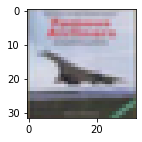

In [ ]:
plot_sample(X_test, y_test, 3)

In [46]:
classes[y_classes[56]]

'horse'

In [ ]:
classes[y_classes[3]]

'airplane'